##  #Capstone Project : McKinsey&Company Prohack
#### --Achieve Singularity

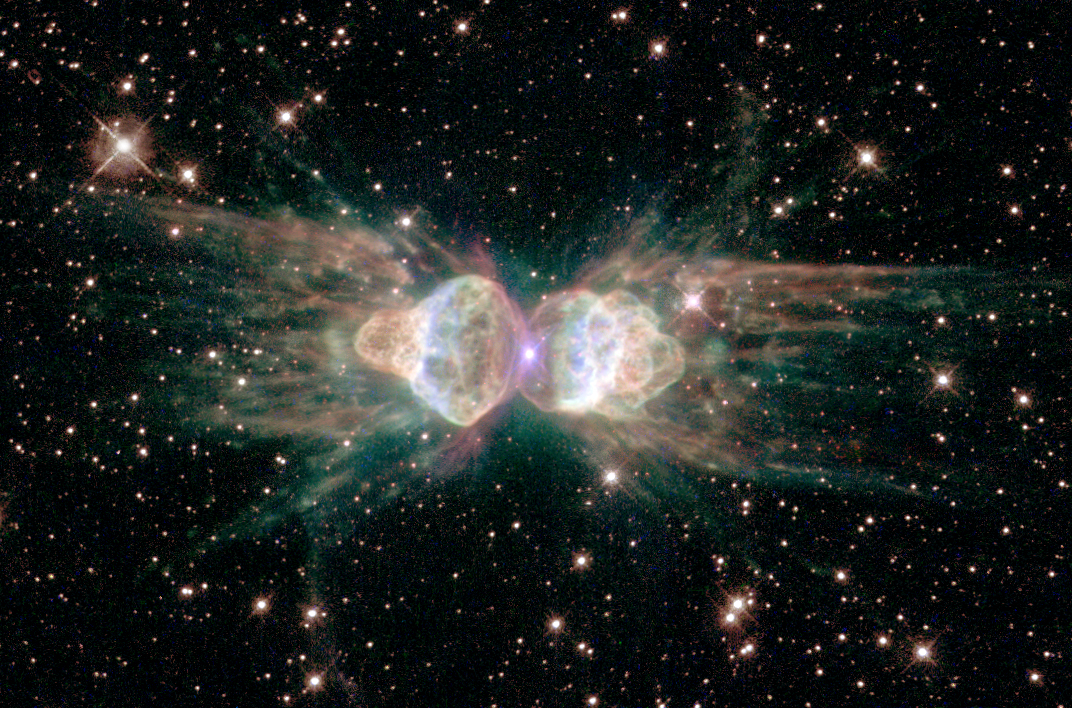

In [4]:
Image(filename='june-30-2019-ant-nebula.jpg', width=1500, height=100) 

In [593]:
#Theme change
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

### Importing Libraries

In [595]:
#For data manipulation
import pandas as pd
import numpy as np

#For visualisation
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
import missingno as msn

#For preprocessing
from sklearn.preprocessing import RobustScaler

#For modeling
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#For evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#For cross-validation
from sklearn import base
from sklearn.model_selection import KFold

#Miscellaneous
from warnings import filterwarnings
from scipy.stats import zscore
from IPython.display import Image
import pickle
%matplotlib inline

In [596]:
sns.set(style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
filterwarnings(action = 'ignore')
%matplotlib inline

### Variable Description

##### ~ galactic_year - the spatial year
##### ~ galaxy - the spatial location
##### ~ existence_expectancy_index - celestial equivalent of life expectancy index 
##### ~ existence_expectancy_at_birth - celestial equivalent of existence expectancy at birth
##### ~ gross_income_per_capita - celestial equivalent of gross income per living alien
##### ~ intergalactic_development_index_(idi) -  celestial equivalent of International development index(IDI)
##### ~ expected_mean_mult - yield of expected and average years of education
##### ~ y - target variable

### Importing Datasets

In [597]:
df_train = pd.concat(map(pd.read_csv, ['train.csv']))
df_test = pd.concat(map(pd.read_csv, ['test.csv']))

In [598]:
df = pd.concat([df_train, df_test], axis=0)

In [599]:
display(df_test.shape, df_train.shape) 

(890, 79)

(3865, 80)

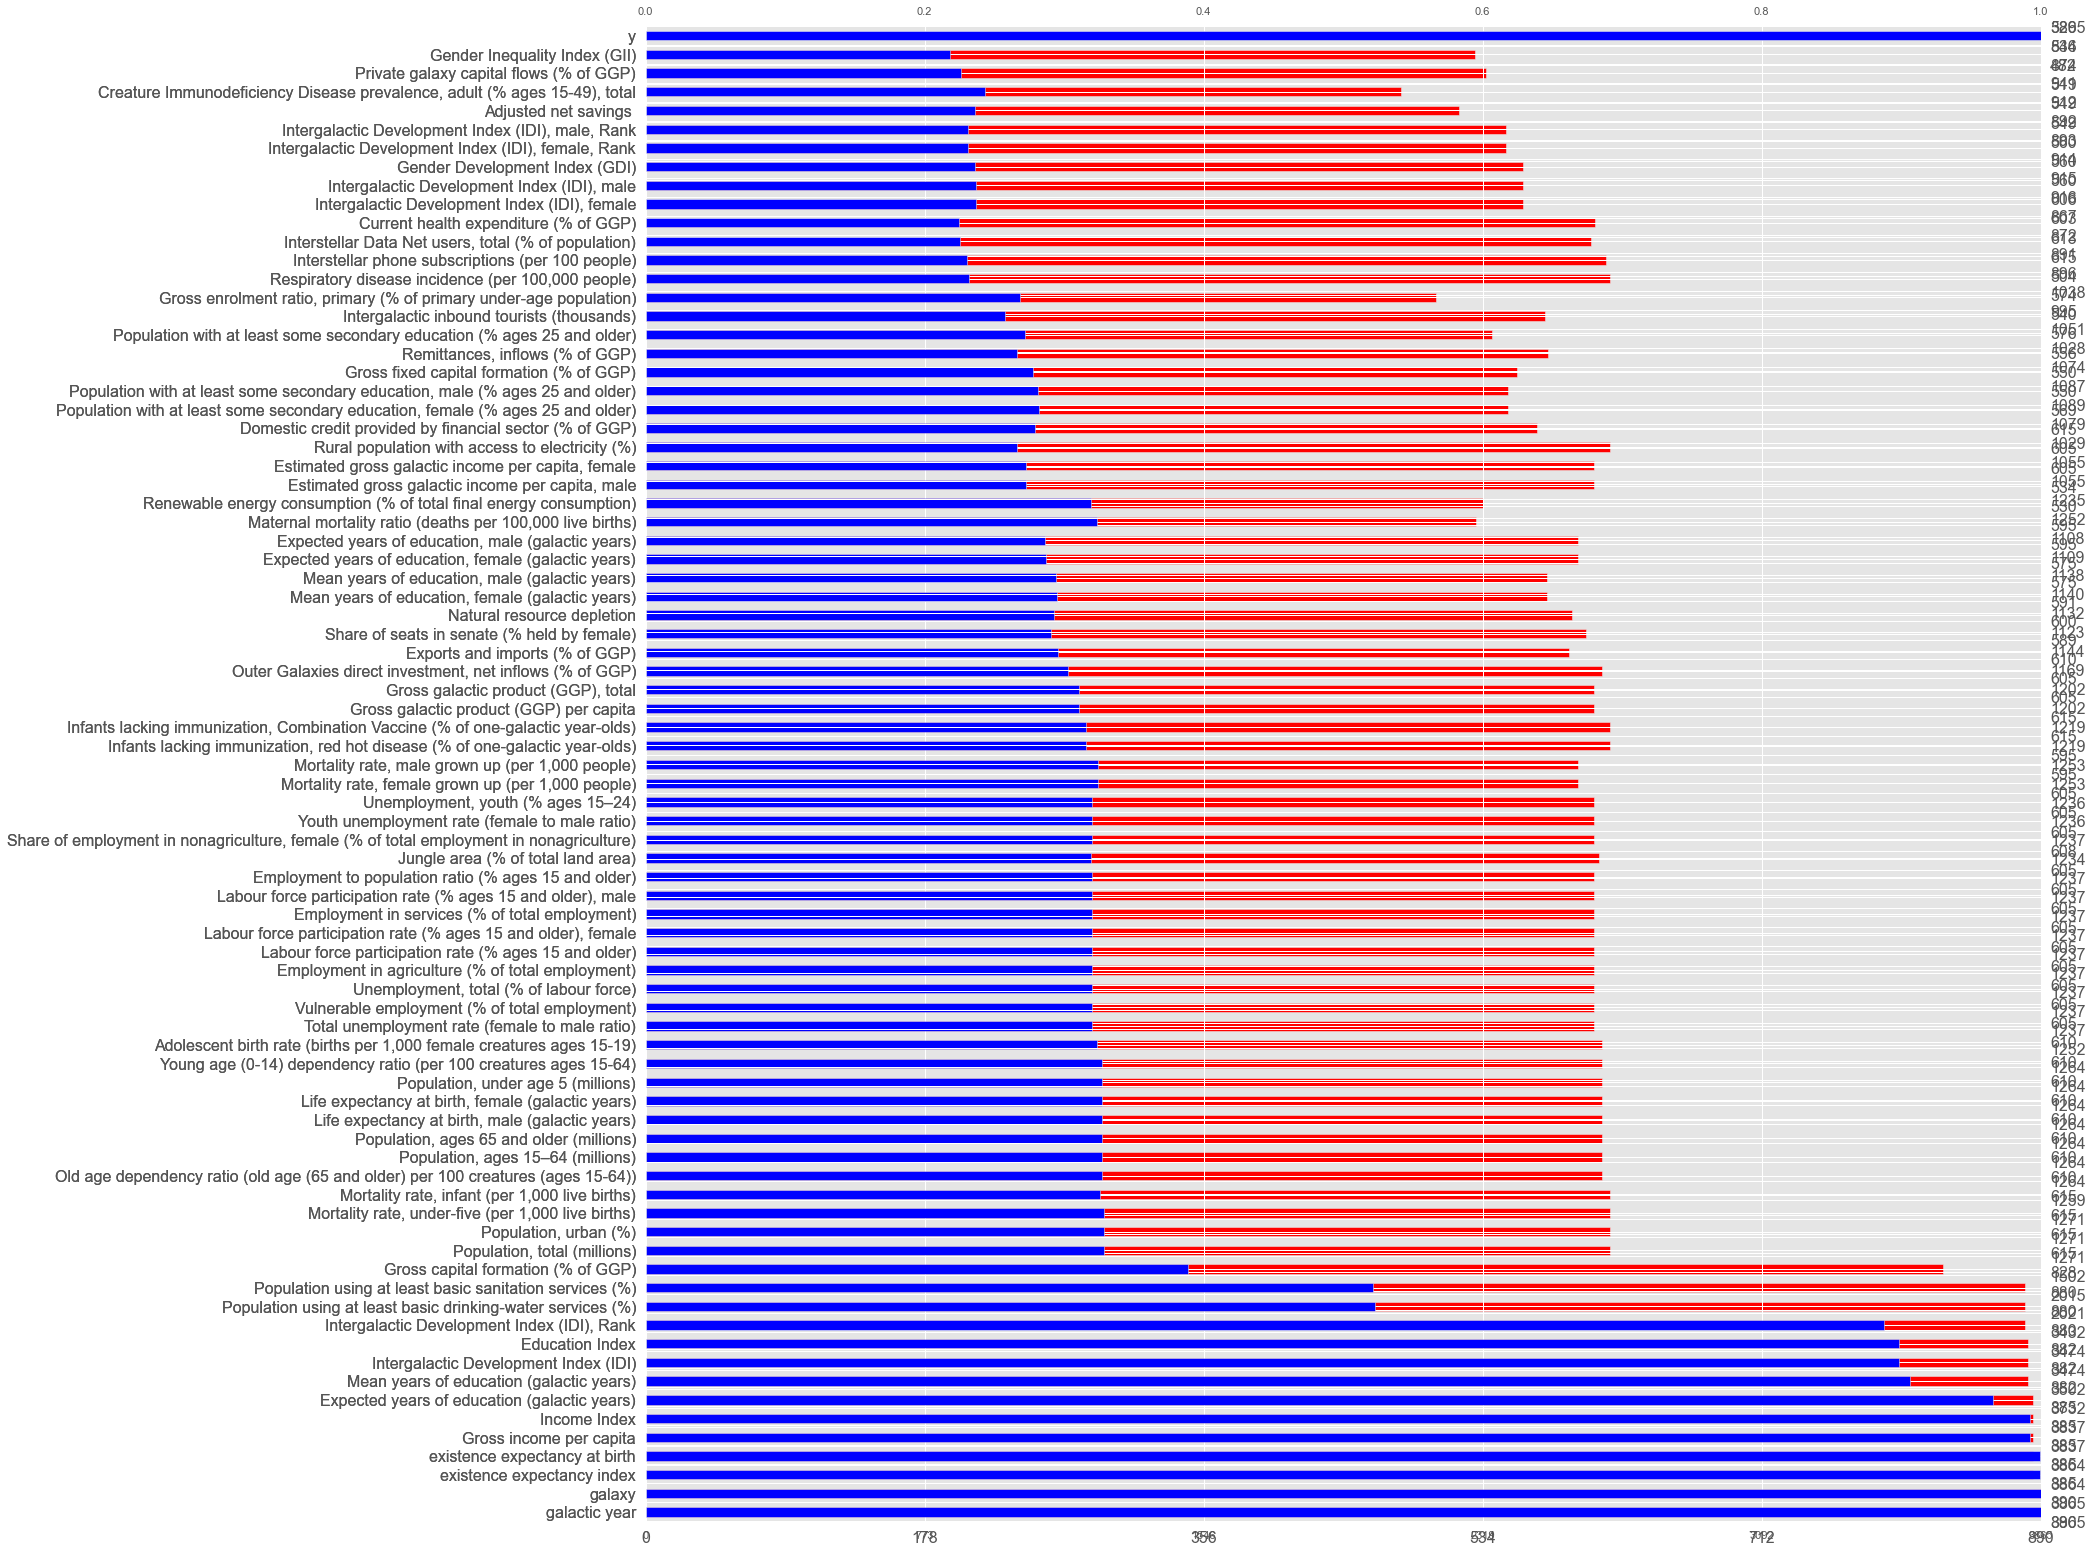

In [509]:
#Visualizing null values of both train and test sets on the same background
msn.bar(df_test, color='red'), msn.bar(df_train, color='blue')
plt.show()

In [510]:
display(df_train.info(memory_usage='deep'), df_test.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

None

None

### Data Cleaning and Preprocessing

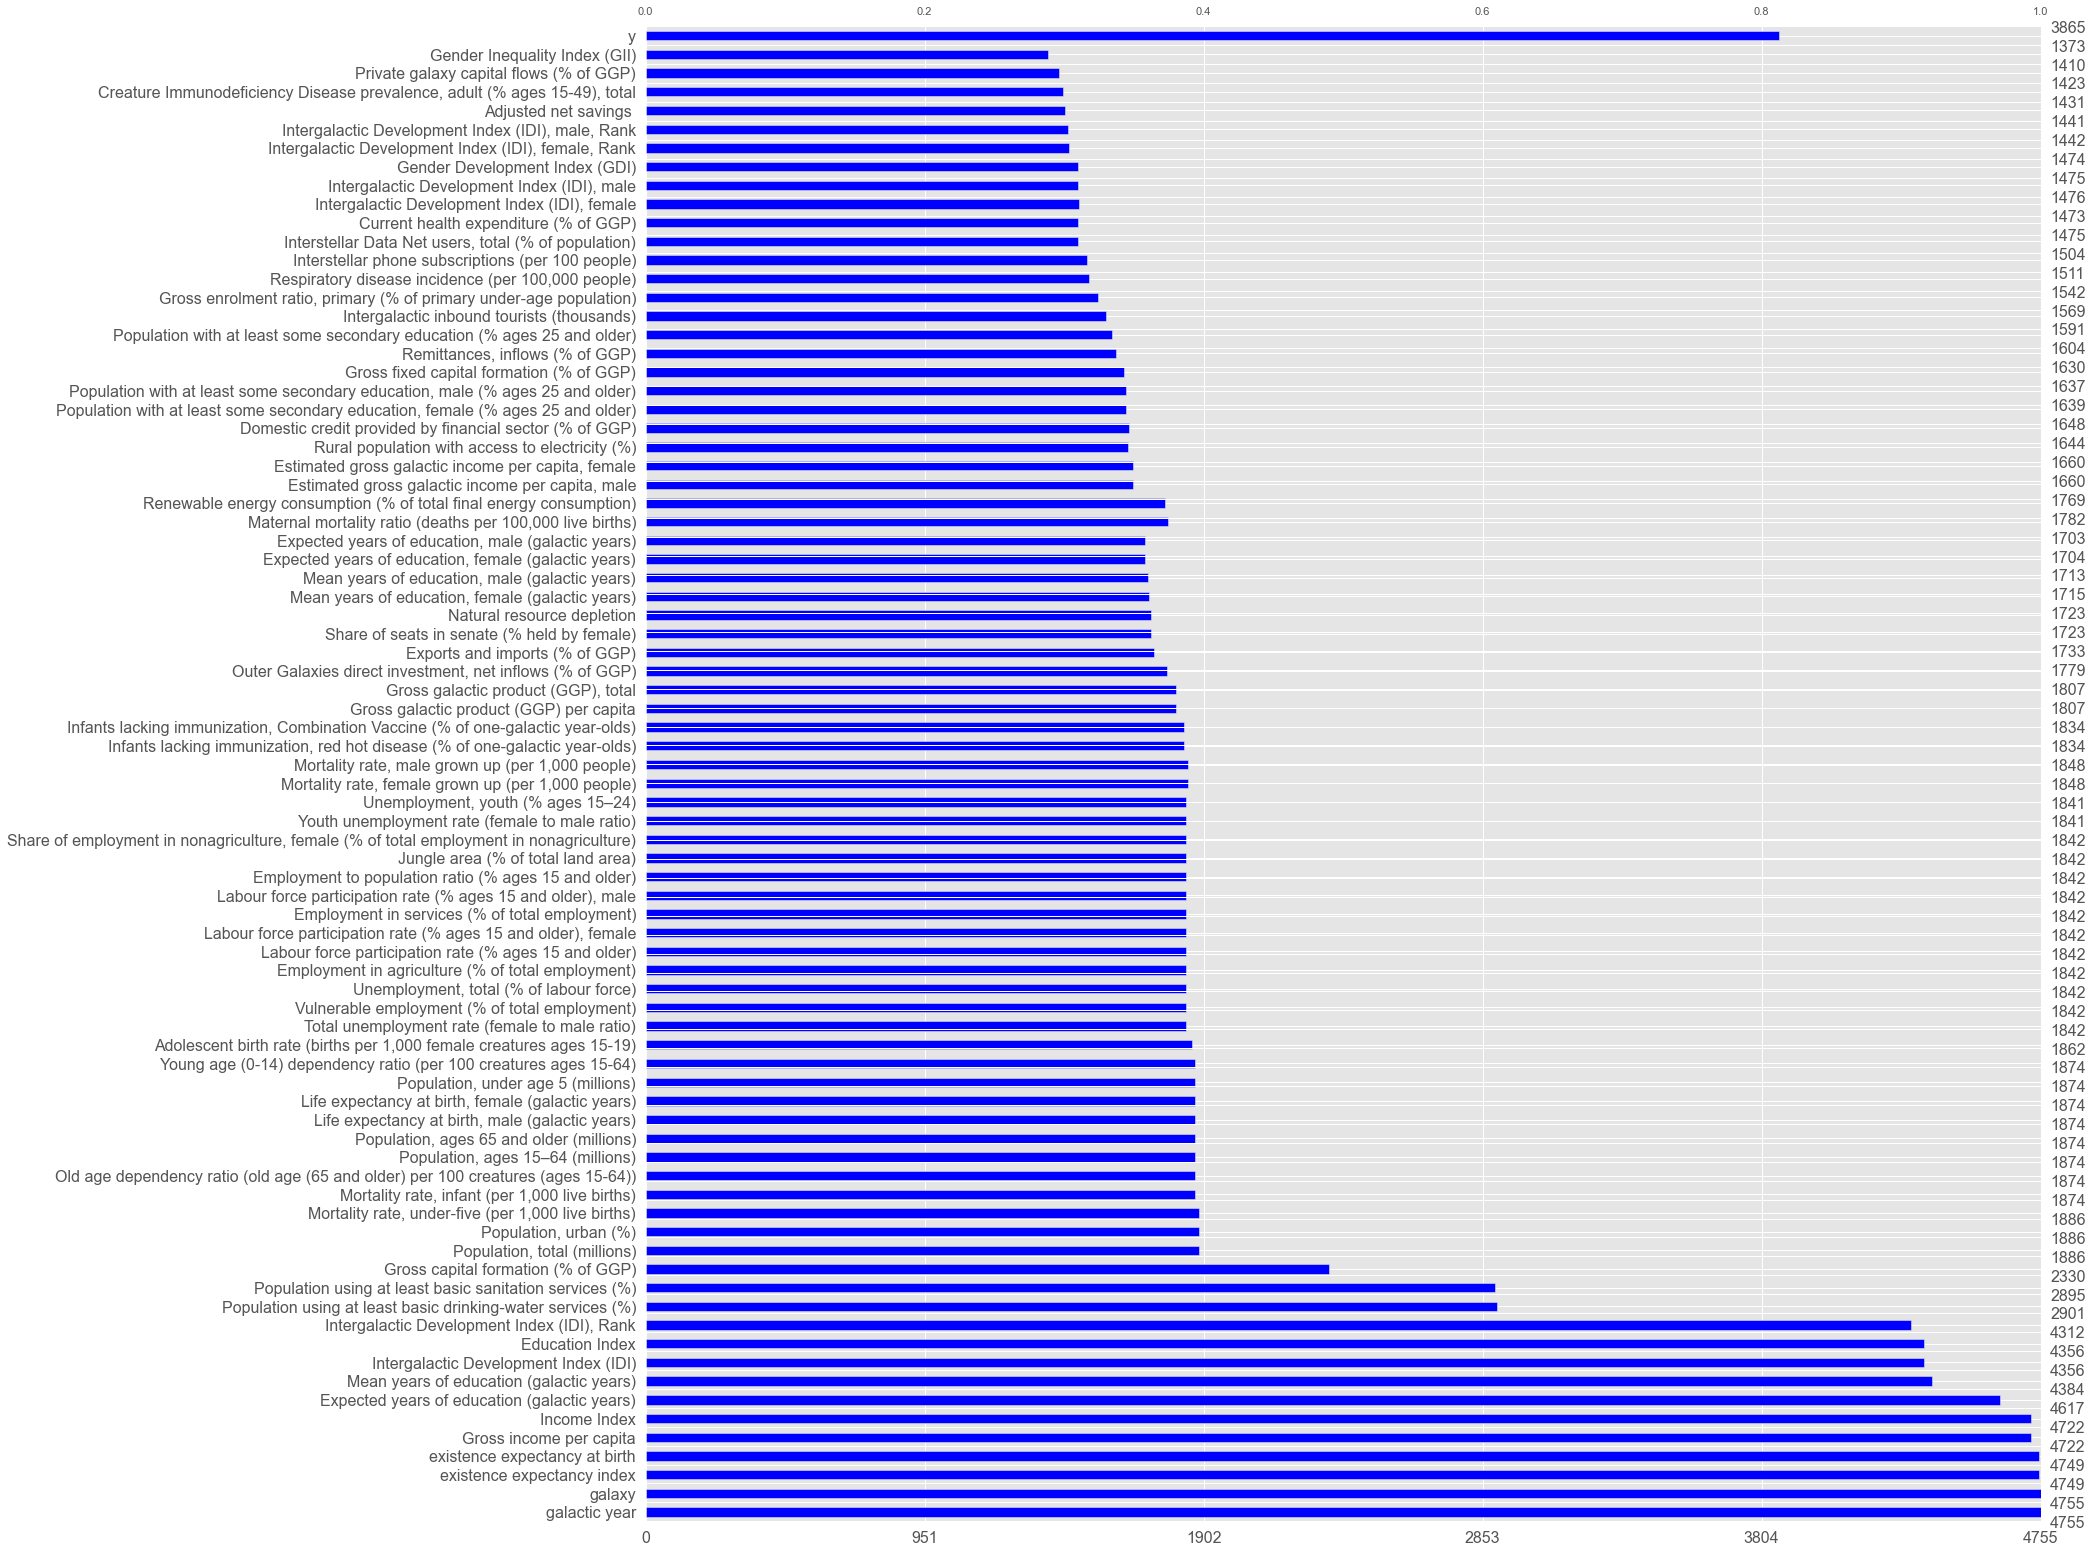

In [333]:
#Visualising the null values of the entire data
msn.bar(df, color='blue')
plt.show()
#Evidently, the null values of the target column pertain to the validation set

In [600]:
%%time
#These are the columns we're gonna work on
df_train = df_train[[f for f in df_train.columns if f in df_train.iloc[:,0:11].columns or f=='y']]
df_test = df_test.iloc[:,0:11]
df = df[[f for f in df.columns if f in df.iloc[:,0:11].columns or f=='y']]  

Wall time: 310 ms


In [601]:
display(df_train.head(), df_test.head())

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,0.154247


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank"
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069


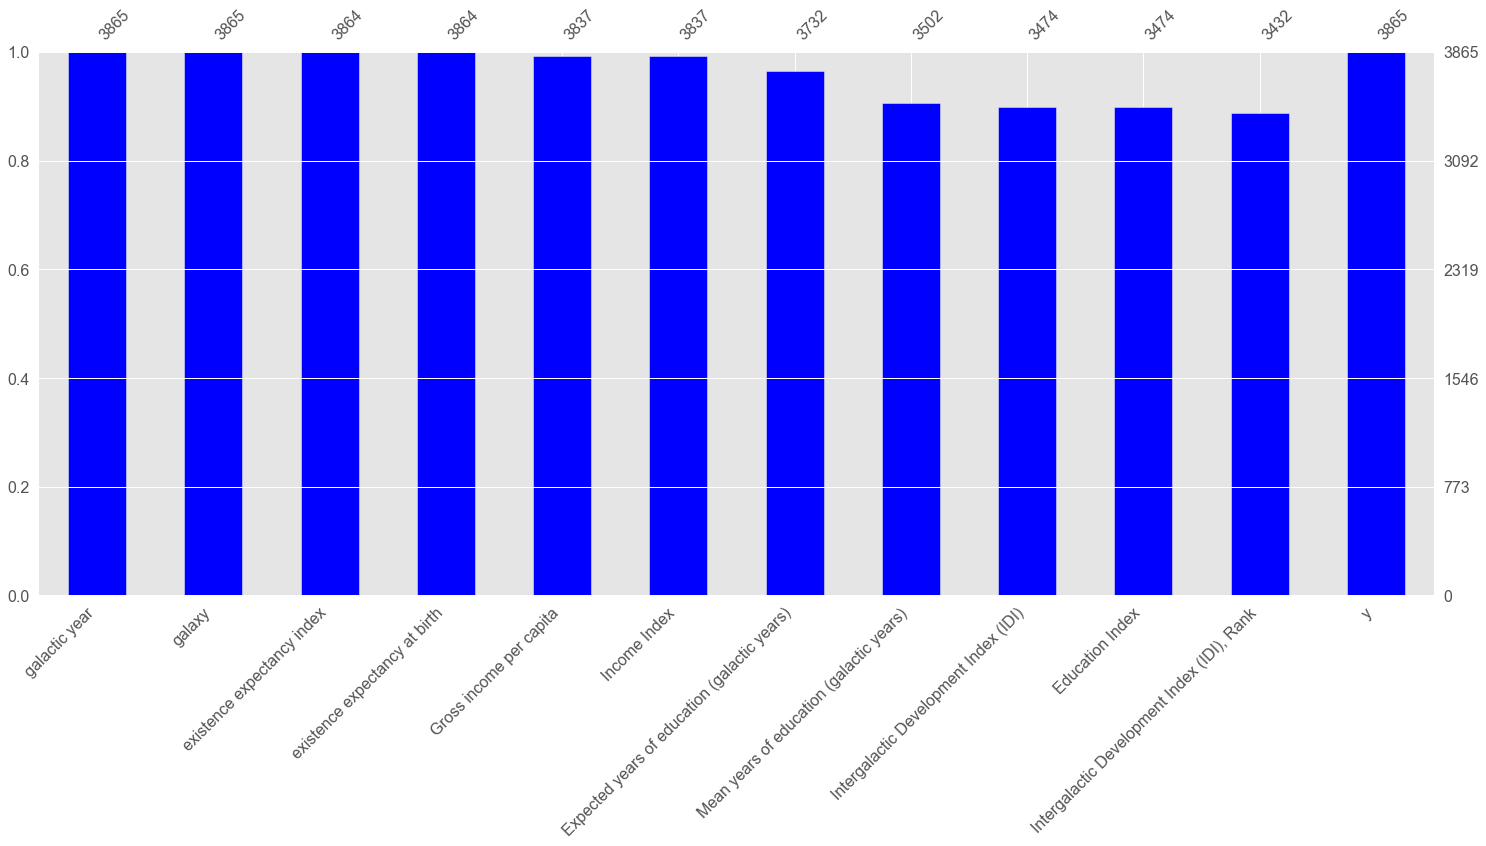

In [510]:
#Null value count of the training set after the elimination
msn.bar(df_train, color='blue')
plt.show()

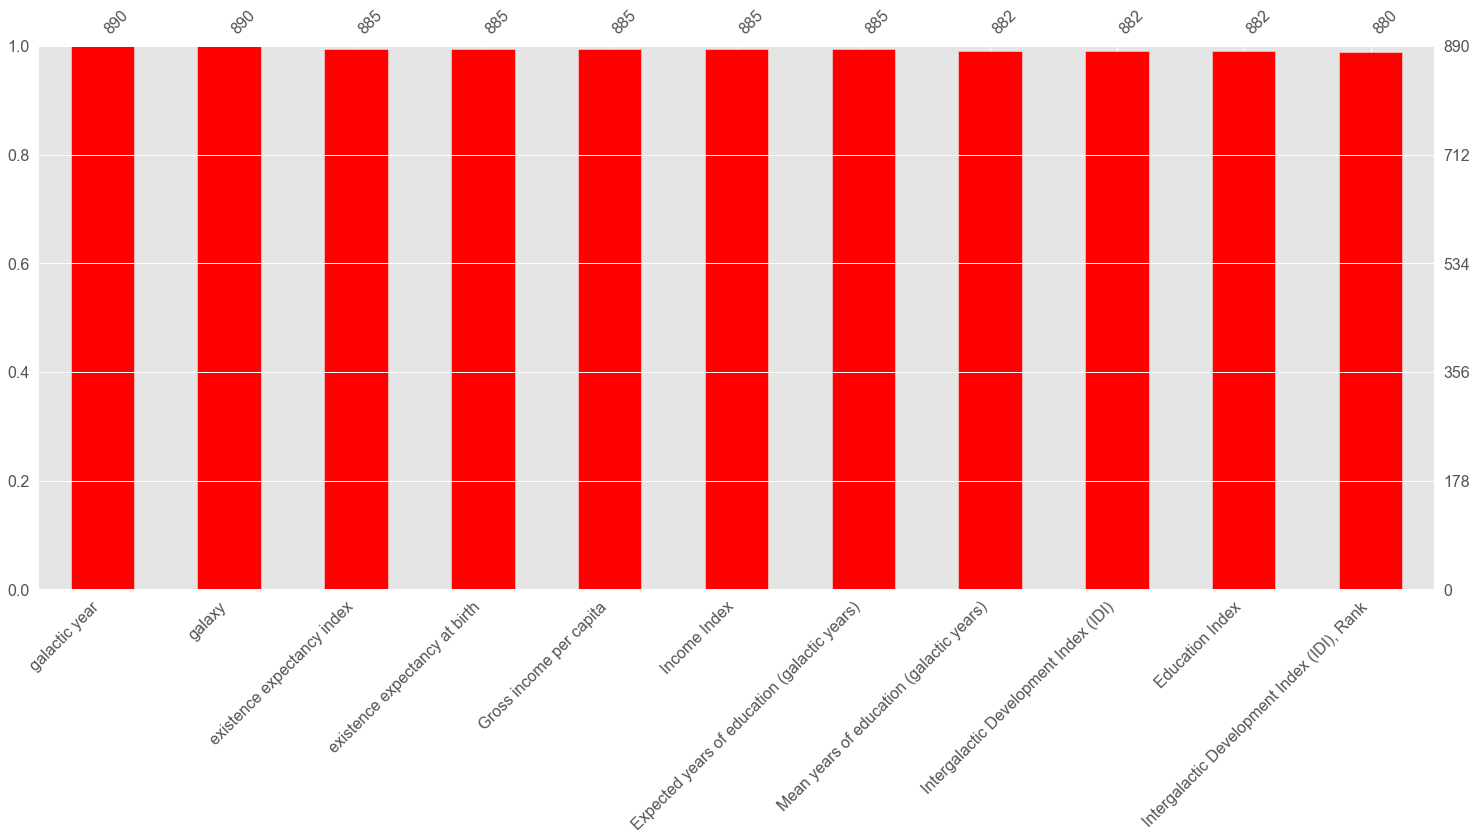

In [344]:
#Null value count of the validation set after the elimination
msn.bar(df_test, color='red')
plt.show()

In [513]:
''' Missing values ratio
per column
'''
def column_null_ratio(data):
    ratio = []
    for f in data.columns:
        n_missing = data[f].isna().sum()
        ratio.append(n_missing / data.shape[0])
    return ratio

In [514]:
#Ratio of null values to the entire records
display(column_null_ratio(df_train),
        column_null_ratio(df_test))

[0.0,
 0.0,
 0.000258732212160414,
 0.000258732212160414,
 0.007244501940491591,
 0.007244501940491591,
 0.034411384217335056,
 0.09391979301423027,
 0.10116429495472186,
 0.10116429495472186,
 0.11203104786545925,
 0.0]

[0.0,
 0.0,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.008988764044943821,
 0.008988764044943821,
 0.008988764044943821,
 0.011235955056179775]

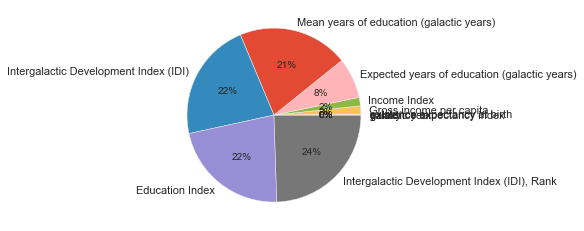

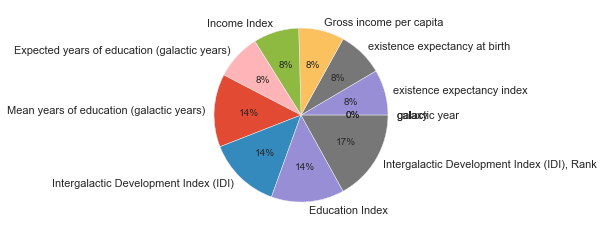

In [400]:
#Visualizing the columnwise proportion of null records for both sets
def columnwise_null_pro(data):
    total_nans = data.isna().sum().sum()
    nan_pct_per_col = (data[[f for f in data.columns]].isna().sum()/total_nans)*100 
    colors = sns.color_palette('pastel')[0:5]
    plt.pie(nan_pct_per_col, labels=data.columns, autopct='%.0f%%')
    plt.show()
columnwise_null_pro(df_train)
columnwise_null_pro(df_test)

In [602]:
#Organizing column names 
def column_names_alter(data):
    data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace(',', ''), inplace=True)
    return print(f'Column names cleaned: {df_train.columns}')
column_names_alter(df)
column_names_alter(df_train)
column_names_alter(df_test)

Column names cleaned: Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'y'],
      dtype='object')
Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')
Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',


In [603]:
#Let's make sure the values have no whitespaces at the beginning or at the end
def values_stripper(data):
    for f in data.columns:
        if data[f].dtype == 'O':
            data[f] = data[f].str.strip()
            print(f'The unique values for {f} variable: {df_train[f].unique()}\n')
values_stripper(df_train)            
values_stripper(df_test)
values_stripper(df)            

The unique values for galaxy variable: ['Large Magellanic Cloud (LMC)' 'Camelopardalis B' 'Virgo I'
 'UGC 8651 (DDO 181)' 'Tucana Dwarf' 'KKh 060' 'Grus II' 'UGCA 292'
 'Aquarius II' 'Andromeda XI' 'Antlia Dwarf' 'IC 1613 (UGC 668)' 'Leo P'
 'Cassiopeia Dwarf (Cas dSph, Andromeda VII)' 'Draco II' 'Sagittarius II'
 'Carina III' 'UGCA 133 (DDO 44)' 'Lacerta I (Andromeda XXXI)' 'Boötes IV'
 'Maffei 2' 'KUG 1210+301B (KK98 127)' 'Andromeda V'
 'Sagittarius Dwarf Sphr SagDEG' 'UGCA 276 (DDO 113)' 'Ursa Minor Dwarf'
 'UGC 9128 (DDO 187)' 'Andromeda XX' 'Segue 2' 'Fornax Dwarf (E356-G04)'
 'Columba I' 'KK98 77' 'Holmberg II (DDO 50, UGC 4305)'
 'ESO 540-030 (KDG 2)' 'NGC 404' 'UGC 8833' 'Perseus I (Andromeda XXXIII)'
 'Horologium II' 'Andromeda XXVI' 'Grus I' 'Andromeda IX'
 'Andromeda XXII[57]' 'ESO 274-01[70]' 'Leo II Dwarf (Leo B, DDO 93)'
 'Reticulum II' 'Andromeda II' 'Indus II' 'MB 1 (KK98 21)' 'UGCA 105'
 'Crater II' 'Andromeda XVIII[60]' 'KKH 11 (ZOAG G135.74-04.53)'
 'Phoenix Dwarf G

In [604]:
#Checking for duplicates
def duplicate_check_remove(data):
    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f'The number of duplicate rows before: {num_duplicates}')
        data.drop_duplicates(inplace = True)
        print(f'The number of duplicate rows now: {data.duplicated().sum()}')
    else:
        print('There are no duplicate rows in the dataset.')
duplicate_check_remove(df_test)
duplicate_check_remove(df_train) 
duplicate_check_remove(df)         

There are no duplicate rows in the dataset.
There are no duplicate rows in the dataset.
There are no duplicate rows in the dataset.


In [605]:
'''To transform categorical variables, 
we'll be using K-Fold Target Encoding instead of One-hot-encoding 
since we have high-cardinal variables.
We'll employ Cross Validation to solve overfitting.
'''
#Checking the number of y instances per galactic year before Target Encoding
#We discover that there's isn't a gigantic gap (but exists) between the classes and the classes themselves aren't too few
display(df_train['galactic_year'].value_counts().to_frame().T,  
        df_train['galaxy'].value_counts().to_frame().T)

,990025,991020,994009,995006,993012,997002,1001000,1005006,999000,992016,996004,998001,1000000,1002001,1004004,1006009,1003002,1012036,1009020,1008016,1010025,1011030,1007012,1013042,1014049,1015056
galactic_year,181,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,90,90,90,90,90,90,89,88,87


,Andromeda XII,Andromeda XXIV,Andromeda XIX[60],Tucana Dwarf,Andromeda XXII[57],Andromeda XX,IC 10 (UGC 192),Cetus III,Andromeda XXIII,Pisces II,Phoenix Dwarf Galaxy (P 6830),Pegasus Dwarf Sph (And VI),Andromeda XV,Eridanus II,Pisces IV (Andromeda XIV),Cassiopeia III (Andromeda XXXII),Andromeda XXV,Pisces V (Andromeda XVI),Andromeda II,Boötes IV,IC 1613 (UGC 668),Andromeda XXVIII,Pegasus III,Pisces Dwarf,Cetus Dwarf,Canes Venatici II Dwarf,Leo IV Dwarf,Andromeda VIII,M32 (NGC 221),Triangulum Galaxy (M33),NGC 147 (DDO 3),Ursa Minor Dwarf,ESO 540-030 (KDG 2),NGC 5237,Virgo I,Sagittarius Dwarf Sphr SagDEG,Tucana IV,Draco II,Horologium I,UGC 9240 (DDO 190),KK98 35,Ursa Major II Dwarf,Grus II,Tucana III,FM2000 1,Pictor II,Willman 1,UGCA 292,Boötes II,Horologium II,NGC 404,Boötes I,Maffei 2,MB 1 (KK98 21),NGC 1560,Aquarius II,UGCA 276 (DDO 113),Grus I,Dwingeloo 2,UGCA 86,Indus II,Sextans Dwarf Sph,NGC 5206,Ursa Major I Dwarf (UMa I dSph),NGC 2366,ESO 321-014[70],UGC 4483,KKH 12,DDO 99 (UGC 6817),UGC 8651 (DDO 181),Reticulum II,Hercules Dwarf,"Holmberg II (DDO 50, UGC 4305)",Camelopardalis B,NGC 1569 (UGC 3056),IC 342,UGC 8508 (I Zw 060),KKR 03 (KK98 230),KUG 1210+301B (KK98 127),Andromeda XVIII[60],NGC 300,HIZSS 003,NGC 55,Antlia Dwarf,ESO 410-G005,UGC 9128 (DDO 187),NGC 3109,GR 8 (DDO 155),KKh 98,Sextans B (UGC 5373),IC 3104,ESO 294-010,KKs 3,NGC 2403,UGCA 438 (ESO 407-018),KKh 060,IC 4662 (ESO 102-14),Antlia B,KKR 25,UGC 4879 (VV124)[61],IC 5152,Leo P,"Sextans A (92205, DDO 75)",KKH 37 (Mai 16),UGCA 15 (DDO 6),Cas 1 (KK98 19),KK98 77,Tucana II,ESO 274-01[70],ESO 325-11,MB 3,Boötes III,NGC 4163 (NGC 4167),Large Magellanic Cloud (LMC),KKH 11 (ZOAG G135.74-04.53),HIPASS J1247-77,Crater II,Reticulum III,Pisces I,Carina III,Segue 2,NGC 3741,Draco Dwarf (DDO 208),UGCA 105,Coma Berenices Dwarf,Carina Dwarf (E206-G220),Dwingeloo 1,UGCA 92,UGCA 133 (DDO 44),UGC 7577 (DDO 125),Donatiello I,Segue 1,Triangulum II,Hydrus I,Carina II,UGC 8833,"Small Magellanic Cloud (SMC, NGC 292)",Maffei 1,NGC 247,Sagittarius II,NGC 5102,Antlia 2,Sculptor Dwarf (E351-G30),NGC 4214 (UGC 7278),Phoenix II,ESO 383-087 (ISG 39),KKh 086,ESO 540-032,M110 (NGC 205),Lacerta I (Andromeda XXXI),Leo T Dwarf,"Leo A (Leo III, DDO 69)",Columba I,Perseus I (Andromeda XXXIII),Andromeda XI,Barnard's Galaxy (NGC 6822),Andromeda III,Andromeda IX,Andromeda I,"Leo I Dwarf (DDO 74, UGC 5470)",Canes Venatici I Dwarf,Leo V Dwarf,Hydra II,Andromeda XXIX,Pisces III (Andromeda XIII),Andromeda V,Andromeda XXVI,Fornax Dwarf (E356-G04),Andromeda XVII,"Cassiopeia Dwarf (Cas dSph, Andromeda VII)",Andromeda Galaxy (M31),"Leo II Dwarf (Leo B, DDO 93)",Cassiopeia II (Andromeda XXX),NGC 185,Pegasus Dwarf Irregular (DDO 216),Andromeda X,Andromeda XXI[57],"Wolf-Lundmark-Melotte (WLM, DDO 221)",Aquarius Dwarf Galaxy (DDO 210),Sagittarius Dwarf Irregular Galaxy (SagDIG),NGC 5253
galaxy,26,26,26,26,26,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,23,23,23,23,23,22,22,22,22,22,22,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,21,21,21,21,20,20,20,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,17,17,17,17,17,17,1


##### We split our data to train and test sets before K-fold target encoding to avoid Data Leakage and false confidence in our results.

In [606]:
X = df_train.drop('y', axis=1) 
y = df_train['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=29)

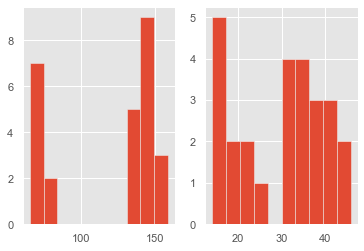

In [569]:
#Let's visualize what we found above for both sets to getter a better grasp
plt.subplot(1,2,1)
plt.hist(X_train['galactic_year'].value_counts())

plt.subplot(1,2,2)
plt.hist(X_test['galactic_year'].value_counts())
plt.show()

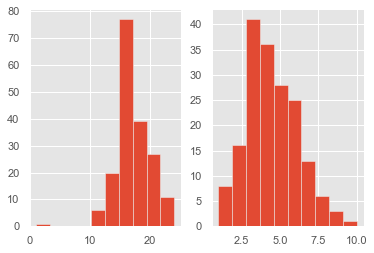

In [566]:
plt.subplot(1,2,1)
plt.hist(X_train['galaxy'].value_counts())

plt.subplot(1,2,2)
plt.hist(X_test['galaxy'].value_counts())
plt.show()

In [607]:
df_train = pd.concat([X_train, y_train],axis=1)
df_test = pd.concat([X_test, y_test],axis=1)

##### Checking whether test set has any categorical values that train doesn't

In [608]:
separate_gal = [f for f in set(df_test['galaxy'].to_list()) 
            if f not in set(df_test['galaxy'].to_list())]
print(f'Test set contains {len(separate_gal)} values that train does not')

Test set contains 0 values that train does not


In [609]:
%%time
separate_year = [f for f in set(df_test['galactic_year'].to_list())  
            if f not in set(df_train['galactic_year'].to_list())]
print(f'Test set contains {len(separate_year)} values that train does not')

Test set contains 0 values that train does not
Wall time: 19 ms


In [610]:
#The test set doesn't include this certain galaxy
df_test[df_test['galaxy']=='NGC 5253']

,galactic_year,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,y


In [611]:
'''One of galaxy classes names NGC 5253 has only 1 value.
Thus, it's average which is required for target encoding
wouldn't give us a fair representation and would
overfit and skew our overall results. That's why we'll have to
either dispose of this record or do some smoothing'''
df_train = df_train[df_train['galaxy']!='NGC 5253'] 

In [571]:
#We see that as time progresses, the number of null values decrease per record
display(df_train[df_train.isna().any(axis=1)].reset_index(drop=True).groupby('galactic_year').count())

,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,y
galactic_year,,,,,,,,,,,
990025,36,36,36,34,34,23,6,3,3,0,36
991020,35,35,35,33,33,23,5,2,2,0,35
992016,33,33,33,32,32,22,6,4,4,0,33
993012,31,31,31,30,30,20,3,1,1,0,31
994009,28,28,28,27,27,18,2,1,1,0,28
995006,25,25,25,23,23,15,3,1,1,0,25
996004,26,26,26,25,25,17,3,1,1,0,26
997002,24,24,24,23,23,15,4,1,1,1,24
998001,27,27,27,25,25,19,2,0,0,0,27


In [612]:
df_train['galactic_year'] = df_train['galactic_year'].astype('O') 

In [613]:
df_train = pd.concat([X_train, y_train], axis=1) 
df_test = pd.concat([X_test, y_test], axis=1) 

##### Let's call the K-fold target encoder class replace the values with each categories' mean. Number of folds is set to 5

In [614]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
   
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):        
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)       
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True)        
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan       
        
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)  #Fill in the place that has become nan with the average value--(1)
            
        if self.verbosity:            
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName, 
                                                                                  np.corrcoef(X[self.targetName].values,encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [615]:
#For train set
for f in df_train.columns[0:2]:
    targetc = KFoldTargetEncoderTrain(f, 'y', n_fold=5)
    df_t = targetc.fit_transform(df_train)    

Correlation between the new feature, galactic_year_Kfold_Target_Enc and, y is -0.1266642991273506.
Correlation between the new feature, galaxy_Kfold_Target_Enc and, y is 0.9582116545050307.


In [616]:
df_train = pd.concat([df_train.iloc[:,2:].drop('y', axis=1), df_train['y']], axis=1)  

In [617]:
df_train.head(3)

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
1343,1.060961,91.040070,44675.241962,1.075997,23.388809,14.105369,1.045958,1.070717,79.671994,0.083775,0.189248,0.186419
136,0.925506,68.482060,20305.981340,0.684261,15.157812,9.002801,0.720076,0.609333,153.386312,0.081554,0.052931,0.059586
3520,0.658288,64.781207,25553.920603,0.686636,13.041403,6.807603,0.487892,0.553238,251.055652,0.083852,0.039423,0.029513


In [618]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X

In [629]:
df_test['galactic_year'] = df_test['galactic_year'].astype('O')

In [630]:
#test_targetc = KFoldTargetEncoderTest(df_t, 'galaxy', 'galaxy_Kfold_Target_Enc')
#df_test = test_targetc.fit_transform(df_test) 
test_targetc = KFoldTargetEncoderTest(df_t, 'galactic_year', 'galactic_year_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test)

In [631]:
df_test = pd.concat([df_test.iloc[:,2:].drop('y', axis=1), df_test['y']], axis=1)  

In [632]:
df_test.head(3)

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
449,0.679102,64.872248,22985.646434,0.558802,11.124554,4.797059,0.559087,0.425879,162.476366,0.083499,0.042955,0.049864
3228,1.140833,89.927659,49914.895881,1.083715,19.288729,13.942648,1.017423,0.794011,86.313635,0.082045,0.154505,0.153376
2185,0.965022,79.219770,16198.056052,0.699947,14.065355,NaN,NaN,NaN,NaN,0.082404,0.053797,0.053242


##### Let's handle the missing values

In [634]:
def impute_numeric(data):
    for f in data.columns[:-3]:
        data.fillna(data[f].mean(), inplace=True)
    return data.isna().sum() 
impute_numeric(df_train)
impute_numeric(df_test)

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

In [42]:
# Coercing the outliers via IQR method
def impute_outliers(value):
    if value > upperlimit:
        value = upperlimit
    elif value < lowerlimit:
        value = lowerlimit
    return value

for feature in df_train_numeric.columns:
    Q3 = df_train_numeric[feature].quantile(q = 0.75)
    Q1 = df_train_numeric[feature].quantile(q = 0.25)
    IQR = Q3 - Q1
    outlier_range = IQR * 2
    upperlimit = Q3 + outlier_range
    lowerlimit = Q1 - outlier_range
    df_train_numeric[feature] = df_train_numeric[feature].apply(impute_outliers)

### EDA (Exploratory Data Analysis) and Feature Engineering

In [637]:
#Let's engineer some new features
df_train['expected_mean_mult'] = df_train['expected_years_of_education_(galactic_years)']*df_train['mean_years_of_education_(galactic_years)']
df_test['expected_mean_mult'] = df_test['expected_years_of_education_(galactic_years)']*df_test['mean_years_of_education_(galactic_years)']

In [638]:
df_train.drop(['expected_years_of_education_(galactic_years)', 'mean_years_of_education_(galactic_years)'],
       axis=1, inplace=True)
df_test.drop(['expected_years_of_education_(galactic_years)', 'mean_years_of_education_(galactic_years)'],
       axis=1, inplace=True)

In [639]:
df_train.drop('y', axis=1, inplace=True) 
df_test.drop('y', axis=1, inplace=True) 

In [640]:
df_train = pd.concat([df_train, y_train], axis=1)
df_test = pd.concat([df_test, y_test], axis=1)

In [641]:
display(df_train.head().T, df_test.head().T)

,1343,136,3520,1385,3450
existence_expectancy_index,1.060961,0.925506,0.658288,0.474964,1.136211
existence_expectancy_at_birth,91.040070,68.482060,64.781207,50.206560,91.810299
gross_income_per_capita,44675.241962,20305.981340,25553.920603,12984.242083,39115.082937
income_index,1.075997,0.684261,0.686636,0.531697,1.002527
intergalactic_development_index_(idi),1.045958,0.720076,0.487892,0.495507,1.104713
education_index,1.070717,0.609333,0.553238,0.357352,1.000432
intergalactic_development_index_(idi)_rank,79.671994,153.386312,251.055652,189.338479,34.895019
galactic_year_Kfold_Target_Enc,0.083775,0.081554,0.083852,0.081144,0.086141
galaxy_Kfold_Target_Enc,0.189248,0.052931,0.039423,0.042188,0.171989
expected_mean_mult,329.907783,136.462772,88.780695,53.344029,352.552504


,449,3228,2185,1271,3150
existence_expectancy_index,0.679102,1.140833,0.965022,0.974463,0.951391
existence_expectancy_at_birth,64.872248,89.927659,79.219770,77.710477,88.300871
gross_income_per_capita,22985.646434,49914.895881,16198.056052,22078.750247,30729.226818
income_index,0.558802,1.083715,0.699947,0.493825,1.021473
intergalactic_development_index_(idi),0.559087,1.017423,0.870909,0.711165,0.913721
education_index,0.425879,0.794011,0.870909,0.840407,0.944710
intergalactic_development_index_(idi)_rank,162.476366,86.313635,0.870909,159.537412,143.721787
galactic_year_Kfold_Target_Enc,0.083499,0.082045,0.082404,0.080717,0.082855
galaxy_Kfold_Target_Enc,0.042955,0.154505,0.053797,0.064104,0.060150
expected_mean_mult,53.365144,268.935945,12.249650,167.188194,188.520377


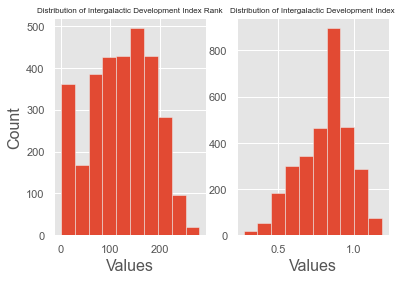

In [642]:
'''Based on the numbers above, we suspect that the variables
intergalactic_development_index_(idi) and intergalactic_development_index_(idi)_rank
are correlated which is not ideal for a Linear Regression model'''
#Let's figure out which correlation test to employ depending on the normality of the following columns
plt.subplot(1, 2, 2)
plt.hist(df_train['intergalactic_development_index_(idi)'])
plt.title(label = 'Distribution of Intergalactic Development Index', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)

plt.subplot(1, 2, 1)
plt.hist(df_train['intergalactic_development_index_(idi)_rank'])
plt.title(label = 'Distribution of Intergalactic Development Index Rank', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)
plt.show()
#Very little skewness is observed, so we use pearson correlation for these two continuous variables

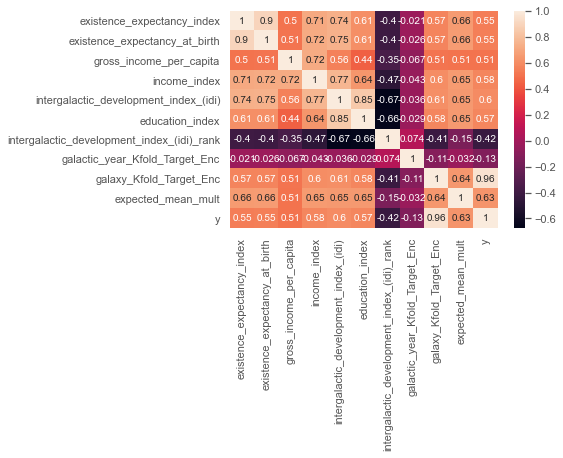

In [643]:
#Significant linear correlation is discovered
sns.heatmap(df_train.corr(method='pearson'), annot=True)
plt.show()

In [644]:
#To counter this, the IDI rank column is dropped
df_train.drop('intergalactic_development_index_(idi)_rank', axis=1, inplace=True) 
df_test.drop('intergalactic_development_index_(idi)_rank', axis=1, inplace=True)  

In [645]:
#2 index columns(income and education) derive the IDI column, so we have no need of them
df_train.drop(['income_index', 'education_index'], axis=1, inplace=True)
df_test.drop(['income_index', 'education_index'], axis=1, inplace=True)

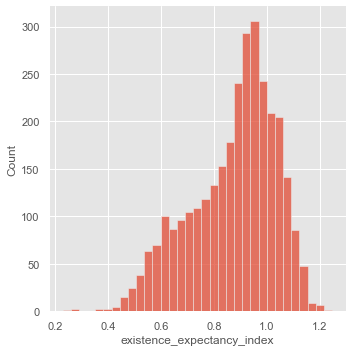

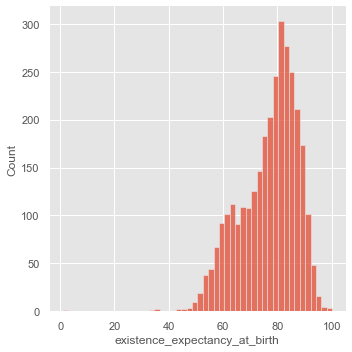

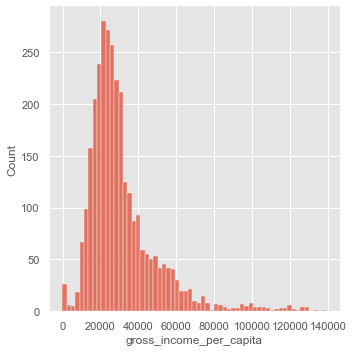

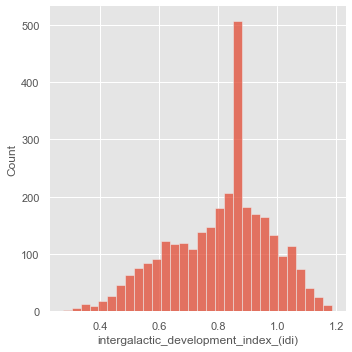

In [652]:
#Let's view the histogram distributions of the remaining continuous features
cols = df_train.columns[0:-4]
for f in cols:
    sns.displot(df_train[f])
    plt.show()

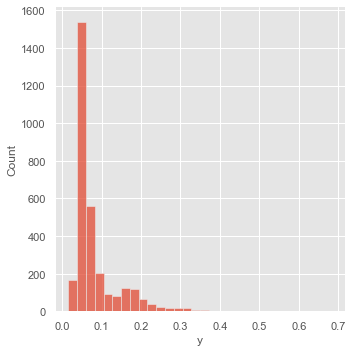

In [653]:
#Lastly, let's check the distribution of our target variable. This will be useful at the end in the prediction phase
sns.displot(df_train['y'], bins=30)
plt.show()

### Modeling
#### 1. Linear Regression
#### 2. XGB Regressor
#### 3. GradientBoosting Regressor
#### 4. RandomForest Regressor

###### Robust scaling both sets

In [654]:
scaler = RobustScaler()
df_train.iloc[:,:-1] = scaler.fit_transform(df_train.iloc[:,:-1])
df_train = pd.DataFrame(df_train)  

In [655]:
scaler = RobustScaler()
df_test.iloc[:,:-1] = scaler.fit_transform(df_test.iloc[:,:-1])
df_test = pd.DataFrame(df_test)  

In [656]:
df_test.tail()

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,intergalactic_development_index_(idi),galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,expected_mean_mult,y
1319,0.782151,0.864612,1.200503,0.145384,-1.041269,2.632248,0.427954,0.162300
2264,-0.991228,-1.507235,-0.508619,-1.029924,-0.219647,-0.264397,-0.741940,0.046008
3649,0.761641,0.691321,1.327336,1.465951,6.642691,5.981200,0.954844,0.477482
960,0.372370,0.197001,-0.238542,0.090965,1.153116,-0.301282,-0.996099,0.051082
1371,-1.507860,-1.680270,-0.170491,-1.416640,-1.041269,-0.336912,-0.517920,0.047234


In [657]:
X_train = df_train.drop('y', axis=1)
y_train = df_train['y']
X_test = df_test.drop('y', axis=1) 

In [659]:
model = LinearRegression()
lin = model.fit(X_train, y_train) 
pred = model.predict(X_test)

In [660]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

In [661]:
grad = GradientBoostingRegressor()
grad.fit(X_train,y_train)
pre = grad.predict(X_test)

In [675]:
rf = RandomForestRegressor(max_depth=10) 
rf.fit(X_train, y_train)
pr = rf.predict(X_test)

### Evaluation

In [664]:
#Evaluation results Linear Regression model
print(f'R^2: {r2_score(y_test,pred)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, pred, squared=False))}')
print(f'Mean Squared Error: {mean_squared_error(y_test, pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,pred)}')

R^2: 0.9403538230791962
Root Mean Squared Error: 0.014701663520410557
Mean Squared Error: 0.00021613891026737054
Mean Absolute Error: 0.0072959257940482134


In [665]:
#Check overfitting for Linear Regression
display(model.score(X_train,y_train),
model.score(X_test,y_test))

0.9197002886308044

0.9403538230791962

In [666]:
#Evaluation results XGBoost Regressor model
print(f'R^2: {r2_score(y_test,preds)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, preds, squared=False))}')
print(f'Mean Squared Error: {mean_squared_error(y_test, preds)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,preds)}')

R^2: 0.9627804865366332
Root Mean Squared Error: 0.011613430316800606
Mean Squared Error: 0.0001348717637231834
Mean Absolute Error: 0.005419446071342741


In [667]:
#Check overfitting for XGBoost
display(xgb_model.score(X_train, y_train),
xgb_model.score(X_test, y_test))

0.9994012162692361

0.953520247341023

In [668]:
#Evaluation results GradientBoosting model
print(f'R^2: {r2_score(y_test,pre)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, pre, squared=False))}')
print(f'Mean Squared Error: {mean_squared_error(y_test, pre)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,pre)}')

R^2: 0.9595174866525573
Root Mean Squared Error: 0.012111806014075941
Mean Squared Error: 0.00014669584492260613
Mean Absolute Error: 0.005472931037807436


In [669]:
#Check overfitting for GradientBoosting model
display(grad.score(X_train,y_train),
grad.score(X_test,y_test))

0.9860850464336459

0.9595174866525573

In [678]:
#Evaluation results RandomForest Regressor model
print(f'R^2: {r2_score(y_test, pr)}')
print(f'Root Mean Squared Error: {(mean_squared_error(y_test, pr, squared=False))}')
print(f'Mean Squared Error: {mean_squared_error(y_test, pr)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,pr)}')

R^2: 0.9646647158800611
Root Mean Squared Error: 0.011315648968529327
Mean Squared Error: 0.00012804391157897883
Mean Absolute Error: 0.005241309118702002


In [677]:
#Check overfitting
display(rf.score(X_train,y_train),
rf.score(X_test,y_test))

0.9900627318411052

0.9646647158800611

### #Predictions on unseen data

In [97]:
df = pd.concat([df_train, df_test], axis=0) 

In [98]:
X_test = df[df['y'].isna()].drop('y', axis=1)
X_train = df[df['y'].notna()].drop('y', axis=1)
y_train = df[df['y'].notna()]['y'] 

In [99]:
model = LinearRegression() 
lin = model.fit(X_train, y_train)  

In [100]:
pred = model.predict(X_test)

In [101]:
grad = GradientBoostingRegressor()
grad.fit(X_train,y_train)
pre = grad.predict(X_test) 

In [102]:
y = pd.Series(pre).to_frame()
y

,0
0,0.043798
1,0.046409
2,0.046335
3,0.042774
4,0.046177
...,...
885,0.039679
886,0.040739
887,0.072622
888,0.049318


In [ ]:
#We choose the predictions of the model with the highest result which is XGBoost Regressor
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

[17:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
pd.Series(preds).to_frame()

In [993]:
df_test['y'] = pd.Series(preds).to_frame()

In [994]:
df_test['y'].unique()

array([0.04196153, 0.04354073, 0.04600941, 0.04188738, 0.04616562,
       0.04305727, 0.04543412, 0.04188646, 0.04298938, 0.04162855,
       0.04369067, 0.04418596, 0.04502637, 0.04315492, 0.04285824,
       0.03756881, 0.04550155, 0.04352597, 0.0453504 , 0.04346664,
       0.03988715, 0.04309866, 0.03720307, 0.04493144, 0.03670271,
       0.04281844, 0.04324375, 0.04626186, 0.04516961, 0.04343493,
       0.04367358, 0.04328825, 0.04356017, 0.03748945, 0.04382551,
       0.04305951, 0.04381242, 0.03956399, 0.04557516, 0.04603878,
       0.03472484, 0.04341943, 0.04481144, 0.04315707, 0.04584263,
       0.0452588 , 0.04262414, 0.04369901, 0.05407951, 0.0435496 ,
       0.04554405, 0.04553348, 0.04302071, 0.03574976, 0.04188677,
       0.04547987, 0.03573414, 0.03991439, 0.04298649, 0.04533879,
       0.04919223, 0.0452007 , 0.04311792, 0.04541703, 0.04279795,
       0.04343829, 0.03674038, 0.04363938, 0.05360214, 0.04988452,
       0.04187275, 0.04027799, 0.04210154, 0.04309228, 0.05160

In [997]:
df_test.tail()

,galactic_year,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,intergalactic_development_index_(idi),expected_mean_mult,y
885,1.480278,-0.795703,0.0,-6.294904,-1.408651,0.298497,-1.329711,0.038158
886,1.480278,-0.403424,0.0,-6.294904,-1.408651,0.298497,-1.329711,0.040886
887,1.480278,0.399647,0.0,-6.294904,-1.408651,0.298497,-1.329711,0.074148
888,1.480278,-0.191417,0.0,-6.294904,-1.408651,0.298497,-1.329711,0.045312
889,1.480278,-0.826331,0.0,-6.294904,-1.408651,0.298497,-1.329711,0.038158


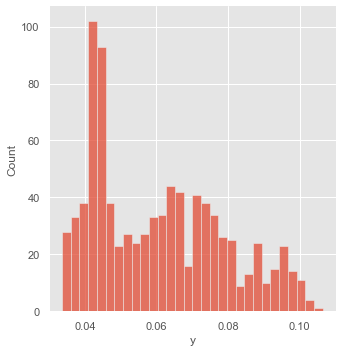

In [996]:
sns.displot(df_test['y'], bins=30)
plt.show()